two-phased method

# Set Variables

In [ ]:
# -------- dataset
# software_name = "Camel"
# software_name = "CloudStack"
software_name = "Geode"
# software_name = "Hbase"

knn_accuracy_threshold = [
    0.5, 0.55, 
    0.6, 0.65, 
    0.7, 0.75, 
    0.8, 0.85, 
    0.9, 0.95
]

In [ ]:
if software_name == "Camel":
    dataset_file_name_ts = "Camel_TimeSeries - v.01"

elif software_name == "CloudStack":
    dataset_file_name_ts = "CloudStack_TimeSeries - v.01"

elif software_name == "Geode":
    dataset_file_name_ts = "Geode_TimeSeries - v.01"

else:
    dataset_file_name_ts = "Hbase_TimeSeries - v.03"

# Google Colab

In [ ]:
# Libs
!pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# load data from google drive
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)
!ls "/content/gdrive/My Drive/"

Mounted at /content/gdrive
'Colab Notebooks'


In [ ]:
# project folder path
project_folder = "gdrive/MyDrive/Colab Notebooks/paper/"

# data folder path
data_folder = "00- My Data/two-phase method/"

# dataset folder path
dataset_folder = software_name + "/"

# output folder path
output_folder = "01- Jupyter Notebook/80- two-phase method/00. Output/"

# Libs

In [ ]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Config

In [ ]:
mypaths = {
    "output": {
        "class_predictabality": project_folder + output_folder + dataset_folder + dataset_file_name_ts + "/class-predictabality-v01.csv"
    }
}

preprocessing_params = {
    "dataset": {
        # time_stamp is the time that we change the class for a bug fixing.
        # id stands for identifier
        "columns_name":   ["bug_report_id", "class_id", "time_stamp", "label"],
        "columns_dtype" : {0: "int64", 1: "int64", 2: "int64", 3:"int32"}
    },
    "timeseries":{
        "columns_name":   ["class_id", "time_stamp", "label"],
        "columns_dtype" : {0: "int64", 1: "int64", 2:"int32"}
    },
    "class_predictabality": {
        "columns_name":   ["class_id"],
        "columns_dtype" : {0: "int64"}
    },
    
    # 0: no change / 1: increase bad smell / -1: decrease bad smell
    "class_labels": [0, 1, -1], 
    "num_classes": 3,
}

knn_model_params = {
    "train_size": 0.8,
    "n_neighbors": 5
}

progress_colours = ["webmaroon", "salmon", "orangered", "deeppink3", "crimson", 
                    "black", "blue", "gray", "cyan4", "darkgreen"]

In [ ]:
mypaths

{'output': {'class_predictabality': 'gdrive/MyDrive/Colab Notebooks/paper/01- Jupyter Notebook/two-phased method/00. Output/Geode/Geode_TimeSeries - v.01/class-predictabality-v01.csv'}}

# Read class-predictabality

In [ ]:
pred_col_name = []
pred_col_name.extend(preprocessing_params["class_predictabality"]["columns_name"])
pred_col_type = {}
pred_col_type.update(preprocessing_params["class_predictabality"]["columns_dtype"])
count = len(pred_col_type)
for th in knn_accuracy_threshold:
    temp1 = "predictions_" + str(th)
    pred_col_name.append(temp1)
    pred_col_type[count] = pd.Int32Dtype()
    count += 1

In [ ]:
pred_col_type

{0: 'int64',
 1: Int32Dtype(),
 2: Int32Dtype(),
 3: Int32Dtype(),
 4: Int32Dtype(),
 5: Int32Dtype(),
 6: Int32Dtype(),
 7: Int32Dtype(),
 8: Int32Dtype(),
 9: Int32Dtype(),
 10: Int32Dtype()}

In [ ]:
pred_col_name

['class_id',
 'predictions_0.5',
 'predictions_0.55',
 'predictions_0.6',
 'predictions_0.65',
 'predictions_0.7',
 'predictions_0.75',
 'predictions_0.8',
 'predictions_0.85',
 'predictions_0.9',
 'predictions_0.95']

In [ ]:
temp = {}
for cn, cd in zip(pred_col_name, pred_col_type.values()):
        temp[cn] = pd.Series(dtype=cd)
df_data_pred = pd.DataFrame(temp)

df_data_pred

,class_id,predictions_0.5,predictions_0.55,predictions_0.6,predictions_0.65,predictions_0.7,predictions_0.75,predictions_0.8,predictions_0.85,predictions_0.9,predictions_0.95


In [ ]:
temp2 = pd.read_csv(
    mypaths["output"]["class_predictabality"],
    dtype=pred_col_type
)
df_data_pred = df_data_pred.append(temp2, ignore_index=True)

In [ ]:
df_data_pred

,class_id,predictions_0.5,predictions_0.55,predictions_0.6,predictions_0.65,predictions_0.7,predictions_0.75,predictions_0.8,predictions_0.85,predictions_0.9,predictions_0.95
0,80848,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,80849,-1,-1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,80850,0,0,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,80851,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,80852,0,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...
16947,118614,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
16948,118616,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
16949,118617,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
16950,118618,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [ ]:
df_data_pred.dtypes

class_id            int64
predictions_0.5     Int32
predictions_0.55    Int32
predictions_0.6     Int32
predictions_0.65    Int32
predictions_0.7     Int32
predictions_0.75    Int32
predictions_0.8     Int32
predictions_0.85    Int32
predictions_0.9     Int32
predictions_0.95    Int32
dtype: object

# class predictability in each th

In [ ]:
num_total = len(df_data_pred)
temp = []
for th in knn_accuracy_threshold:
    new_column_name = "predictions_" + str(th)
    temp2 = num_total - df_data_pred[new_column_name].isna().sum()
    temp3 = round((temp2 / num_total) * 100)
    temp.append(temp3)

#temp2 = num_total
per_class_predictable = temp
#numNan = g.iloc[:, -1].isna().sum()

In [ ]:
per_class_predictable

[46, 46, 45, 45, 44, 43, 42, 41, 39, 38]

# Plot

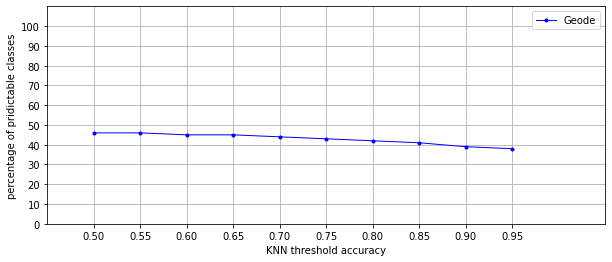

In [ ]:
# figsize=(a, b) : a_width, b_height
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
axes.plot(knn_accuracy_threshold, per_class_predictable, label=software_name, color="blue", 
            linestyle="solid", lw=1, marker=".")

# axes.set_title(software_name)
axes.set_xlabel("KNN threshold accuracy")
axes.set_ylabel("percentage of pridictable classes")

axes.set_xlim([0.45, 1.05])
axes.get_xaxis().set_ticks(knn_accuracy_threshold)

axes.set_ylim([0, 110])
axes.get_yaxis().set_ticks(list(range(0, 101, 10)))

axes.legend()
axes.grid(True)